# Tokamak GOLEM Basic diagnostics

<center>
<img src="DASsetup.png" width=49%/>
<img src="icon-fig.png" width=49%/>
</center>


## Procedure (<a href=StandardDAS.ipynb>This notebook to download</a>)<br>
<a href=BasicDiagnostics.sh>bash wrapper</a>, <a href=jup-nb_stderr.log>Error log</a>

## Prerequisities:  function definitions

Load libraries

In [100]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants, integrate, signal, interpolate
import sqlalchemy   # high-level library for SQL in Python
import pandas as pd
import subprocess

For interactive web figures

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
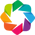

In [101]:
import holoviews as hv
hv.extension('bokeh')
import hvplot.pandas

For conditional rich-text boxes

In [102]:
from IPython.display import Markdown

Define global constants.

In [103]:
data_URL = "http://golem.fjfi.cvut.cz/shots/{shot_no}/Diagnostics/PlasmaDetection/{identifier}"  # TODO workaround
parameters_URL = 'http://golem.fjfi.cvut.cz/shots/{shot_no}/Production/Parameters/{identifier}'

shot_no = 49093
destination='/Results/'
destination_save='./Results/'+str(shot_no)+'/'
os.makedirs(destination_save, exist_ok=True )
# try to get thot number form SHOT_NO envirnoment variable, otherwise use the specified one
# shot_no = os.environ.get('SHOT_NO', 0)

The `DataSource` downloads and caches data (by full URL) in a temporary directory and makes them accessible as files.

In [104]:
ds = np.DataSource(destpath='/tmp')

In [105]:
def print_and_save(phys_quant, value, format_str='%.3f'):
    print(phys_quant+" = %.5f" % value)
    with open(destination+phys_quant, 'w') as f:
        f.write(format_str % value)
    update_db_current_shot(phys_quant,value)    
        
def update_db_current_shot(field_name, value):
    # subprocess.call(["export PGPASSWORD=`cat /golem/production/psql_password`;psql -q -U golem golem_database --command='UPDATE operation.discharges SET \""+field_name+"\"="+str(value)+" WHERE shot_no IN(SELECT max(shot_no) FROM operation.discharges)'"],shell=True)
    subprocess.call(["export PGPASSWORD=`cat /golem/production/psql_password`;psql -q -U golem golem_database --command='UPDATE diagnostics.basicdiagnostics SET \""+field_name+"\"="+str(value)+" WHERE shot_no IN(SELECT max(shot_no) FROM diagnostics.basicdiagnostics)'"],shell=True)
    
    
def open_remote(shot_no, identifier, url_template=data_URL):
    return ds.open(url_template.format(shot_no=shot_no, identifier=identifier))

def read_value(shot_no, identifier):
    """Return the value for given shot as a number if possible"""
    value = open_remote(shot_no, identifier, data_URL).read()
    return pd.to_numeric(value, errors='ignore')

def read_parameter(shot_no, identifier):
    return open_remote(shot_no, identifier, parameters_URL).read().strip()
    
def read_signal(shot_no, identifier): 
    file = open_remote(shot_no, identifier, data_URL + '.csv')
    return pd.read_csv(file, names=['Time',identifier],
                     index_col='Time').squeeze()  # squeeze makes simple 1-column signals a Series

In [106]:
def correct_inf(signal):
    """Inteprolate Inf values"""
    signal = signal.replace([-np.inf, np.inf], np.nan).interpolate()
    return signal

In [107]:
t_Bt = float(read_parameter(shot_no, 'TBt')) * 1e-6  # from us to s
t_CD = float(read_parameter(shot_no, 'Tcd')) * 1e-6  # from us to s
offset_sl = slice(None, min(t_Bt, t_CD) - 1e-4)

## Plasma detection result loading
This part of the algorithm is done with higher priority before the this notebook

In [108]:
b_plasma = read_value(shot_no, destination+'b_plasma') == 1
t_plasma_start = read_value(shot_no, destination+'t_plasma_start')
t_plasma_end = read_value(shot_no, destination+'t_plasma_end')
plasma_lifetime = read_value(shot_no, destination+'t_plasma_duration')
if b_plasma:
    heading = Markdown("### Plasma detected\n\n"
f"plasma lifetime of {plasma_lifetime:.1f} ms, from {t_plasma_start:.1f} ms to {t_plasma_end:.1f} ms")
else:
    heading = Markdown("### No plasma detected (vacuum discharge)")
heading

### Plasma detected

plasma lifetime of 24.1 ms, from 3.2 ms to 27.3 ms

In [109]:
def show_plasma_limits(in_seconds=True):
    t_scale = 1e-3 if in_seconds else 1
    if b_plasma:
        for t in (t_plasma_start, t_plasma_end):
            plt.axvline(t * t_scale, color='k', linestyle='--')

## $U_l$ management

### Check the data availability

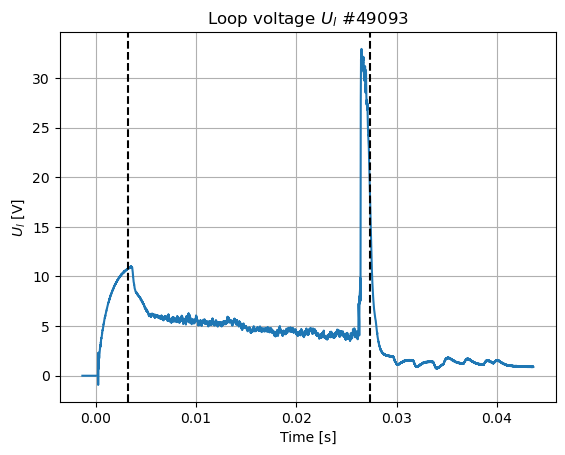

In [110]:
loop_voltage = read_signal(shot_no, 'U_Loop')
polarity_CD = read_parameter(shot_no, 'CD_orientation')
if polarity_CD != 'CW':                   # TODO hardcoded for now!
    loop_voltage *= -1  # make positive
loop_voltage = correct_inf(loop_voltage)
loop_voltage.loc[:t_CD] = 0
ax = loop_voltage.plot(grid=True)
show_plasma_limits()
ax.set(xlabel="Time [s]", ylabel="$U_l$ [V]", title="Loop voltage $U_l$ #{}".format(shot_no));

In [111]:
print(pd.__version__)


2.1.3


## $B_t$ calculation

### Check the data availability
It is as magnetic measurement, so the raw data only give $\frac{dB_t}{dt}$

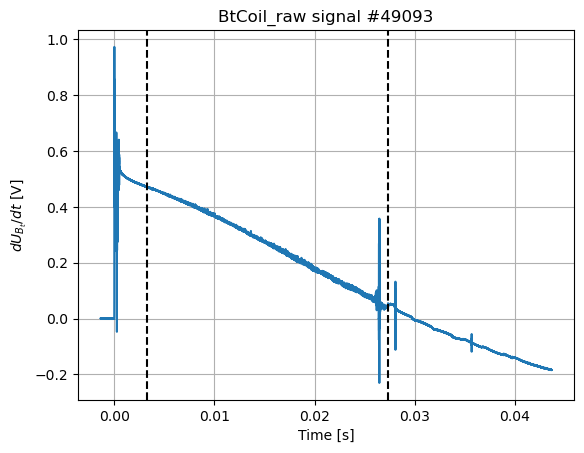

In [112]:
dBt = read_signal(shot_no,'U_BtCoil')
polarity_Bt = read_parameter(shot_no, 'Bt_orientation')
if polarity_Bt != 'CW':                   # TODO hardcoded for now!
    dBt *= -1  # make positive
dBt = correct_inf(dBt)
dBt -= dBt.loc[offset_sl].mean()
ax = dBt.plot(grid=True)
show_plasma_limits()
ax.set(xlabel="Time [s]", ylabel="$dU_{B_t}/dt$ [V]", title="BtCoil_raw signal #{}".format(shot_no));

### Integration (it is a magnetic diagnostic) & calibration

In [113]:
K_BtCoil = float(read_parameter(shot_no, 'SystemParameters/K_BtCoil')) # Get BtCoil calibration factor
print('BtCoil calibration factor K_BtCoil={} T/(Vs)'.format(K_BtCoil))

BtCoil calibration factor K_BtCoil=70.42 T/(Vs)


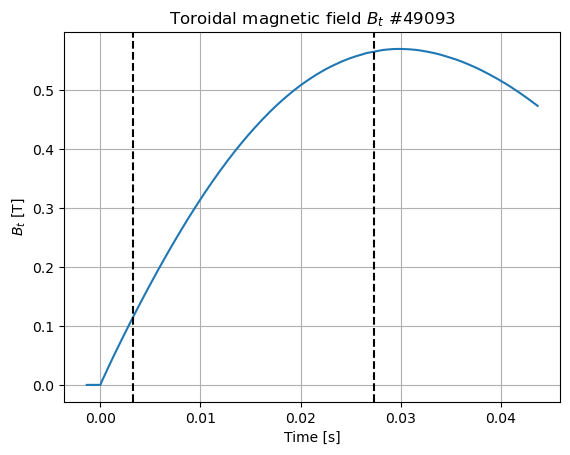

In [114]:
Bt = pd.Series(integrate.cumtrapz(dBt, x=dBt.index, initial=0) * K_BtCoil, 
               index=dBt.index, name='Bt')
ax = Bt.plot(grid=True)
show_plasma_limits()
ax.set(xlabel="Time [s]", ylabel="$B_t$ [T]", title="Toroidal magnetic field $B_t$ #{}".format(shot_no));

## Chamber (+ Plasma) current $I_{p+ch}$ calculation

The Rogowski coil around the chamber measures the total current contained within its boundaries. Therefore, if there is plasma, it measures the sum of the plasma and chamber currents. In a vacuum discharge it measures only the chamber current.

### Check the data availability

Because it is a magnetic measurement, the raw data only gives $\frac{dI_{p+ch}}{dt}$

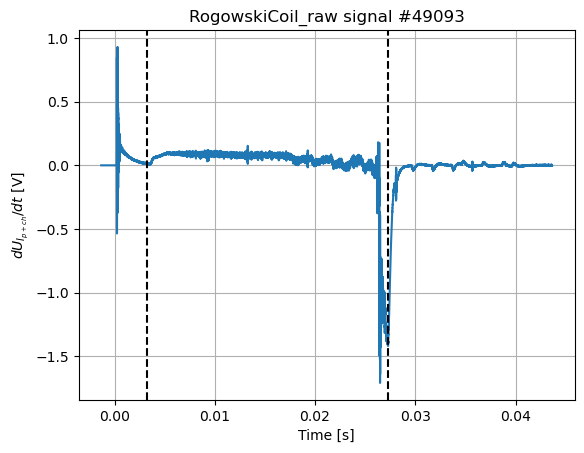

In [115]:
dIpch = read_signal(shot_no, 'U_RogCoil')
if polarity_CD == 'CW':                   # TODO hardcoded for now!
    dIpch *= -1  # make positive
dIpch = correct_inf(dIpch)
dIpch -= dIpch.loc[offset_sl].mean() # subtract offset
dIpch.loc[:t_CD] = 0
ax = dIpch.plot(grid=True)
show_plasma_limits()
ax.set(xlabel="Time [s]", ylabel="$dU_{I_{p+ch}}/dt$ [V]", title="RogowskiCoil_raw signal #{}".format(shot_no));

### Integration (it is a magnetic diagnostic) & calibration

In [116]:
K_RogowskiCoil = float(read_parameter(shot_no, 'SystemParameters/K_RogowskiCoil')) # Get RogowskiCoil calibration factor
print('RogowskiCoil calibration factor K_RogowskiCoil={} A/(Vs)'.format(K_RogowskiCoil))

RogowskiCoil calibration factor K_RogowskiCoil=5300000.0 A/(Vs)


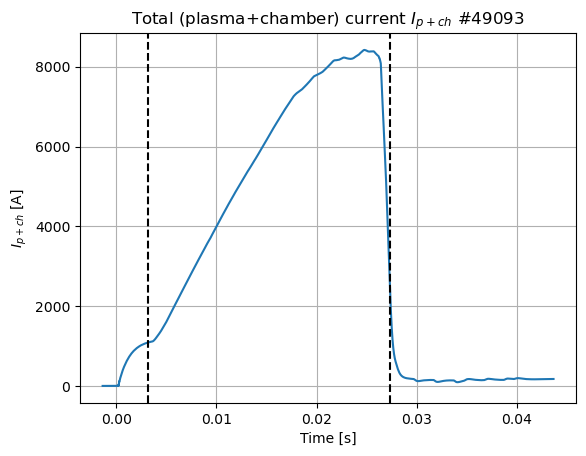

In [117]:
Ipch = pd.Series(integrate.cumtrapz(dIpch, x=dIpch.index, initial=0) * K_RogowskiCoil,
                index=dIpch.index, name='Ipch')
ax = Ipch.plot(grid=True)
show_plasma_limits()
ax.set(xlabel="Time [s]", ylabel="$I_{p+ch}$ [A]", title="Total (plasma+chamber) current $I_{{p+ch}}$ #{}".format(shot_no));

## Chamber current $I_{ch}$ calculation

In [118]:
R_chamber = float(read_parameter(shot_no, 'SystemParameters/R_chamber')) # Get Chamber resistivity
print('Chamber resistivity R_chamber={} Ohm'.format(R_chamber))

Chamber resistivity R_chamber=0.0097 Ohm


In [119]:
L_chamber = float(read_parameter(shot_no, 'SystemParameters/L_chamber')) # Get Chamber inductance
print('Chamber inductance L_chamber={} H'.format(L_chamber))

Chamber inductance L_chamber=1e-06 H


The chamber current $I_{ch}$ satisfies the equation (neglecting the mutual inductance with the plasma)
$$U_l = R_{ch} I_{ch} + L_{ch} \frac{d I_{ch}}{dt}$$
Therefore, the following initial value problem must be solved to take into account the chamber inductance properly
$$\frac{d I_{ch}}{dt} = \frac{1}{L_{ch}}\left( U_l - R_{ch} I_{ch}\right), \quad I_{ch}(t=0)=0$$

In [120]:
U_l_func = interpolate.interp1d(loop_voltage.index, loop_voltage)  # 1D interpolator
def dIch_dt(t, Ich):
    return (U_l_func(t) - R_chamber * Ich) / L_chamber
t_span = loop_voltage.index[[0, -1]]
solution = integrate.solve_ivp(dIch_dt, t_span, [0], t_eval=loop_voltage.index, )
Ich = pd.Series(solution.y[0], index=loop_voltage.index, name='Ich')

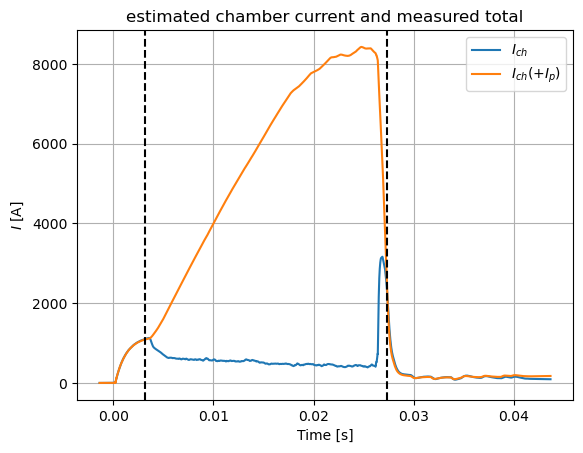

In [121]:
for I in [Ich.rename('$I_{ch}$'), Ipch.rename('$I_{ch}(+I_p)$')]:
    ax = I.plot()
ax.legend()
show_plasma_limits()
ax.set(xlabel='Time [s]', ylabel='$I$ [A]', title='estimated chamber current and measured total')
plt.grid()

## Plasma current $I_{p}$ calculation
If there is plasma, the plasma current can be estimated as the difference between the total measured current and the estimated chamber current $I_p=I_{p+ch}-I_{ch}$

### Plasma detected

plasma lifetime of 24.1 ms, from 3.2 ms to 27.3 ms

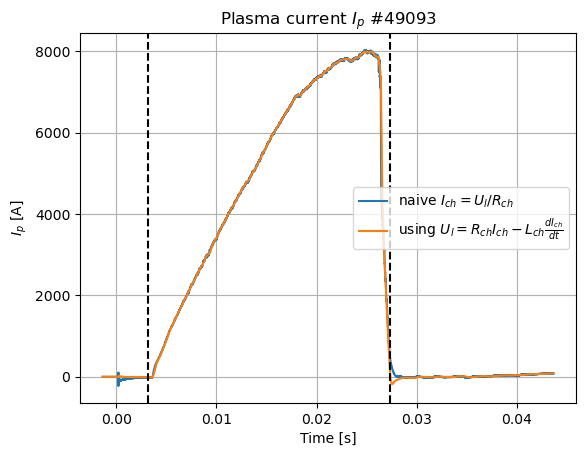

In [122]:
if b_plasma:
    Ip_naive = Ipch - loop_voltage/R_chamber  # creates a new Series
    Ip = Ipch - Ich
    Ip.name = 'Ip'
    Ip_naive.plot(grid=True, label='naive $I_{ch}=U_l/R_{ch}$')
    ax = Ip.plot(grid=True, label=r'using $U_l = R_{ch} I_{ch} - L_{ch} \frac{d I_{ch}}{dt}$')
    ax.legend()
    show_plasma_limits()
    ax.set(xlabel="Time [s]", ylabel="$I_{p}$ [A]", title="Plasma current $I_{{p}}$ #{}".format(shot_no));
else:
    Ip = Ipch * 0  # no current
heading

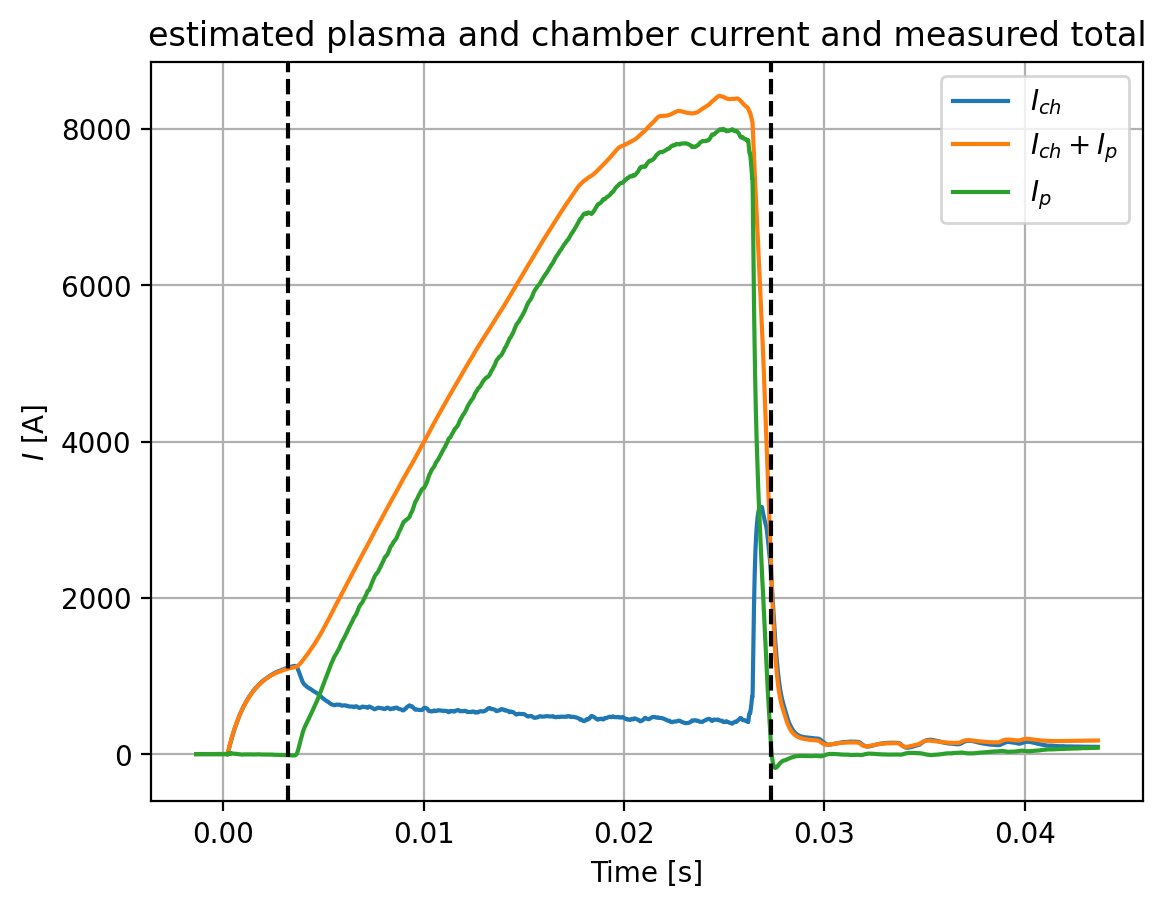

In [123]:
fig = plt.figure(dpi=200)
for I in [Ich.rename('$I_{ch}$'), Ipch.rename('$I_{ch}+I_p$'), Ip.rename('$I_p$')]:
    ax = I.plot()
ax.legend()
show_plasma_limits()
ax.set(xlabel='Time [s]', ylabel='$I$ [A]', title='estimated plasma and chamber current and measured total')
plt.grid()
plt.savefig('icon-fig.png')

## Overview graphs and parameters

For convenience time is saved and displayed in ms, currents in kA.

In [124]:
df_processed = pd.concat(
    [loop_voltage.rename('U_loop'), Bt, Ip*1e-3, Ich*1e-3], axis='columns')
df_processed.index = df_processed.index * 1e3  # to ms
df_processed.head()

U_loop            Bt   Ip  Ich
Time                                     
-1.349486     0.0  0.000000e+00  0.0  0.0
-1.348486     0.0 -4.149498e-08  0.0  0.0
-1.347486     0.0 -7.336224e-08  0.0  0.0
-1.346486     0.0 -1.024787e-07  0.0  0.0
-1.345486     0.0 -1.219674e-07  0.0  0.0

In [125]:
if b_plasma:
    plasma_lines = hv.VLine(t_plasma_start) * hv.VLine(t_plasma_end)
    Ip_line = df_processed['Ip'].hvplot.line(ylabel='Iᴄʜ, Iₚ [kA]', label='Iₚ', by=[], xlabel='time [ms]')
else:
    plasma_lines = Ip_line = hv.Curve([])
layout = df_processed['U_loop'].hvplot.line(ylabel='Uₗ [V]', xlabel='', by=[]) * plasma_lines +\
df_processed['Bt'].hvplot.line(ylabel='Bₜ [T]', xlabel='', by=[]) * plasma_lines +\
df_processed['Ich'].hvplot.line(label='Iᴄʜ', by=[]) * Ip_line *\
   plasma_lines

plot = layout.cols(1).opts(
    hv.opts.Curve(width=600, height=200, title='', ylim=(0, None), show_grid=True),
    hv.opts.VLine(color='black', alpha=0.7, line_dash='dashed')
                        )
hvplot.save(plot, destination_save+'homepage_figure.html')
plot

:Layout
   .Overlay.U_loop :Overlay
      .Curve.U_loop :Curve   [Time]   (U_loop)
      .VLine.I      :VLine   [x,y]
      .VLine.II     :VLine   [x,y]
   .Overlay.Bt     :Overlay
      .Curve.Bt :Curve   [Time]   (Bt)
      .VLine.I  :VLine   [x,y]
      .VLine.II :VLine   [x,y]
   .Overlay.I      :Overlay
      .Curve.Iᴄʜ :Curve   [Time]   (Ich)
      .Curve.Iₚ  :Curve   [Time]   (Ip)
      .VLine.I   :VLine   [x,y]
      .VLine.II  :VLine   [x,y]

Save each processed signal Series in a separate CSV file with Time and value columns

In [126]:
signal_files = []
for sig_name, signal in df_processed.items():
    fname = f'{destination}/{sig_name}.csv'
    signal.to_csv(fname, header=False)
    signal_files.append(fname)

In [127]:
units = ['V', 'T', 'kA', 'kA']

In [128]:
Markdown("Time series in graph in CSV format:\n"
         + "\n".join(f' - [{fn.split("/")[-1]}]({fn}) [ms, {u}]' 
                     for (u, fn) in zip(units, signal_files)))

Time series in graph in CSV format:
 - [U_loop.csv](/Results//U_loop.csv) [ms, V]
 - [Bt.csv](/Results//Bt.csv) [ms, T]
 - [Ip.csv](/Results//Ip.csv) [ms, kA]
 - [Ich.csv](/Results//Ich.csv) [ms, kA]

In [129]:
if b_plasma:
    plasma_sl = slice(t_plasma_start, t_plasma_end)
else:
    plasma_sl = slice(t_Bt, None)   # TODO really use whole discharge ?
df_during_plasma = df_processed.loc[plasma_sl]
df_overview = df_during_plasma.quantile([0.01, 0.5, 0.99])  # use quantiles to skip peaks
df_overview.index = ['min', 'mean', 'max']  # actually quantiles, but easier to understand
if b_plasma:
    df_overview.loc['start'] = df_during_plasma.iloc[0]
    df_overview.loc['end'] = df_during_plasma.iloc[-1]
else:
    df_overview.loc['start'] = df_overview.loc['end'] = np.nan
df_overview.loc['units'] = units
# make units row first
df_overview = df_overview.iloc[np.roll(np.arange(df_overview.shape[0]), 1)]

In [130]:
df_overview

U_loop        Bt        Ip       Ich
units          V         T        kA        kA
min     3.769531  0.121606 -0.014293  0.397671
mean    5.133594  0.433609  5.390385  0.536764
max    31.332969  0.564634  7.991095  3.085828
start   10.80625  0.113633 -0.013343  1.105265
end    20.108594  0.565355  0.183871    2.3952

In [131]:
for agg in ('mean', 'max'):
    for quantity, value in df_overview.loc[agg].items():
        print_and_save(quantity+'_'+agg, value)

U_loop_mean = 5.13359
Bt_mean = 0.43361
Ip_mean = 5.39038
Ich_mean = 0.53676
U_loop_max = 31.33297
Bt_max = 0.56463
Ip_max = 7.99110
Ich_max = 3.08583


In [132]:
#print_and_save('U_loop_breakdown', df_overview.loc['start', 'U_loop'])

In [133]:
#print_and_save('t_Ip_max', df_during_plasma.Ip.idxmax())